<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データ読み込み" data-toc-modified-id="データ読み込み-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データ読み込み</a></span></li><li><span><a href="#距離" data-toc-modified-id="距離-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>距離</a></span></li><li><span><a href="#係数ベクトルdLw" data-toc-modified-id="係数ベクトルdLw-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>係数ベクトルdLw</a></span></li><li><span><a href="#wの更新" data-toc-modified-id="wの更新-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>wの更新</a></span></li><li><span><a href="#最急降下の繰り返し" data-toc-modified-id="最急降下の繰り返し-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>最急降下の繰り返し</a></span></li><li><span><a href="#QR分解" data-toc-modified-id="QR分解-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>QR分解</a></span></li><li><span><a href="#結果" data-toc-modified-id="結果-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>結果</a></span></li></ul></div>

<br />

<div style="text-align: center;">
<font size="5">数式処理group work-3(線形代数)解答例</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/symbolic_math/group_works/group_work_3_ans.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2009-2018  </font>
</div> 

``` ruby
ruby ../bin/pick_works_from_ans.rb gw3_ex_ans.ipynb -1 '' '14'
```

# データ読み込み

train_A.dataには特徴量が，train_b.dataには悪性(1)か良性(-1)かを示す数値が入っている．
訓練(tain(ing))データを読み込み，
仮説ベクトル$\boldsymbol{w}$の初期値を全て0.0001として，
最初の30データの正誤を表示せよ．
テキストのshow_accuracyを少し改良すればできる．


# 距離
1. 行列$A$, ベクトル$w,b$の形状を確かめよ．
1. また，$A.w$の形状を確かめよ．
1. さらに$A.w-b$の距離の2乗$||A.w -b ||^2$を計算せよ．
1. $A.w$と$b$の距離とは乳がんの分類器においては何を意味するか？

A[i]にはデータが入っている．またwは分類器である．これらの積$A[i].w$は悪性か良性かを判断
する数値を与える．従ってそのベクトルの距離は，全てのデータに対する正誤の2乗和となる．


# 係数ベクトルdLw
最急降下法による仮説ベクトル$\boldsymbol{w}$の最適化を試みる．
最急降下法の概念図を以下に示した．損失関数の値$L(\boldsymbol{w})$
をz軸にとって(x,y)平面を$\boldsymbol{w}$と見立てて，
その勾配$dL/dw$に従って極小値を求めるステップを
刻んでいく様子を示している．
単なるイメージ図なんで，コードの中身は無視してください．


<IPython.core.display.Javascript object>


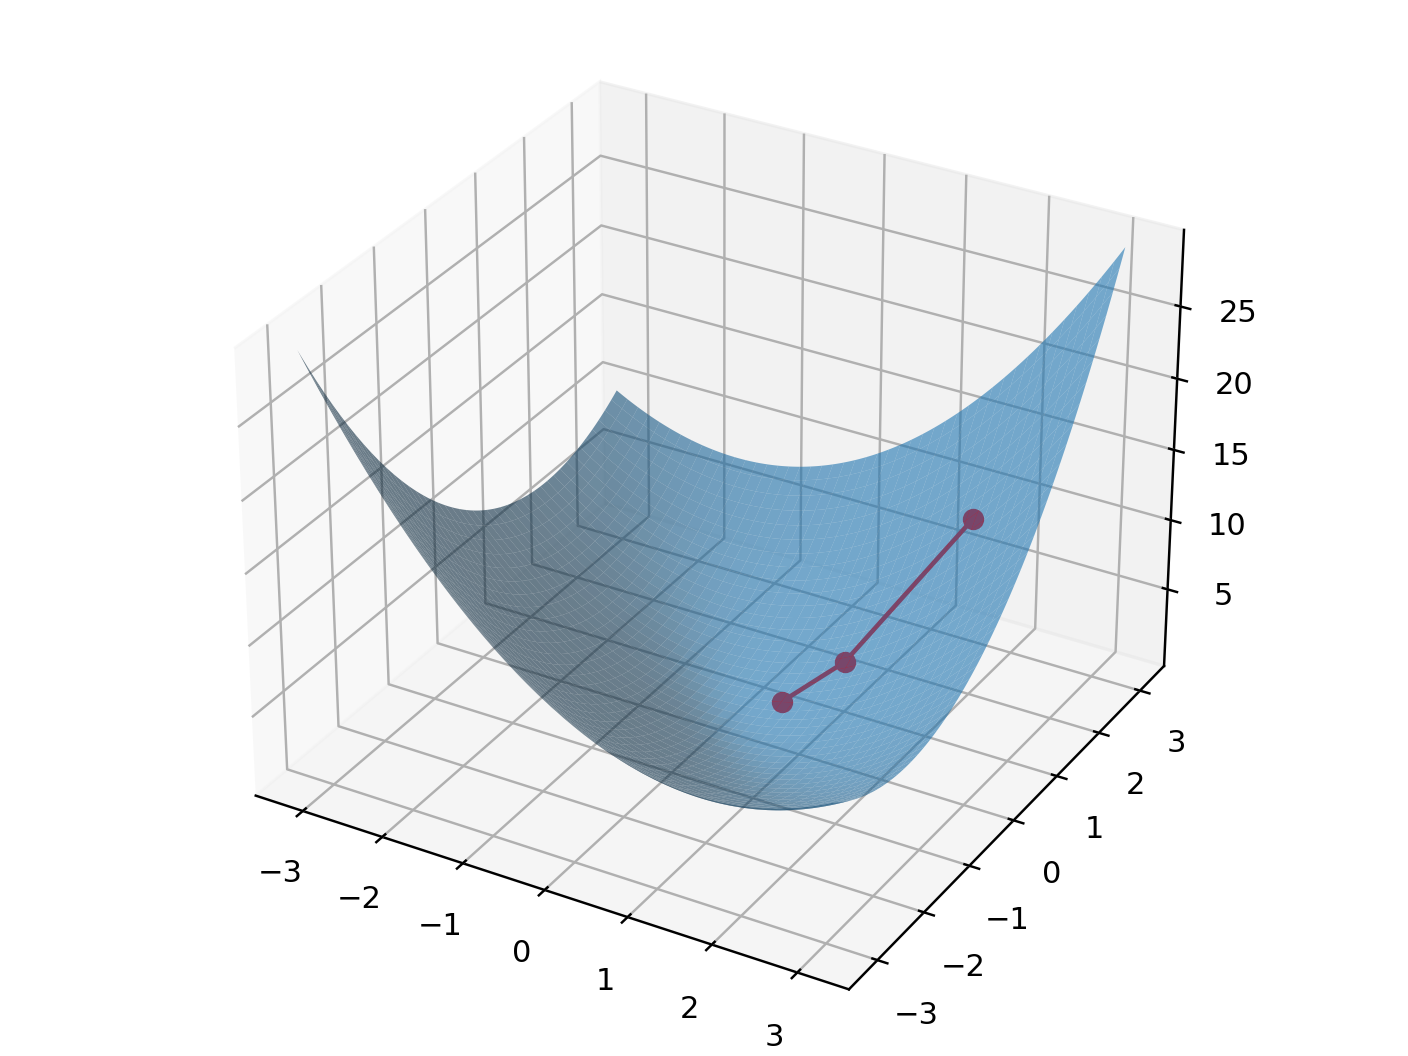

<ipython-input-1-6a9f96ea6a91>:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot3d = Axes3D(fig)


In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return x**2+y**2+x*y

x = np.arange(-np.pi, np.pi, 0.02)
y = np.arange(-np.pi, np.pi, 0.02)
X, Y = np.meshgrid(x, y)
Z1 = f(X,Y)

x_p = [2, 1, 0.5]
y_p = [2, 1, 0.5]
z_p = [f(x_p[0], y_p[0]),f(x_p[1], y_p[1]),
      f(x_p[2], y_p[2])]
    
fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot(x_p, y_p, z_p, "o-", color="red")
plot3d.plot_surface(X,Y,Z1,alpha=0.6) 

plt.show()

損失関数の偏微分
$$
\begin{aligned}
\frac{\partial L}{\partial w_j} &= 
\sum_{i=1}^n \frac{\partial}{\partial w_j}(A_i \cdot w -b_i)^2 \\
&= \sum_{i=1}^n 2(A_i \cdot w -b_i) A_{ij}
\end{aligned}
$$
の最後の式の$A_{ij}$の係数ベクトルをdLwとして求めよ．その次元をshapeで確かめよ？

# wの更新

係数ベクトルdLwとAのdot積が勾配ベクトルとなる．
$$
w = w - \sigma(dLw^t \cdot A)^t
$$
として仮説ベクトル$w$を勾配に従って進めたベクトルを求めよ．
ここで$\sigma$はステップ幅と呼ばれ，勾配に従ってどの程度進むかを調整するパラメータで，大きすぎると最適値を通り越し，小さすぎると最適値にたどり着くまでに繰り返し(iteration)が多くなる．ここでは，`3.0*10**(-9)`程度とせよ．

# 最急降下の繰り返し
先ほどの漸近操作を300回程度繰り返し，その前後でwを表示してみよ．
最初の30データの予測値を比較せよ．

# QR分解

行列$A$のQR分解を行い，Q, R行列の次元をshapeで確かめよ．

# 結果
仮説ベクトル$\boldsymbol{w}$の最適値
$$
ww =  R^{-1}.Q^t.b
$$
を求めよ．その値と精度を確かめよ．また距離の2乗
$$
||A.w -b ||^2
$$
が下がっていることを確かめよ．